In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")


In [3]:
df = pd.read_csv('newlongIowaLiqourfixed.csv',parse_dates=[1],index_col=[0],)

In [4]:
df[:20]

,Date,Category,Category Name,Vendor Number,Vendor Name,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,2016-12-26,1082200.0,IMPORTED SCHNAPPS,421.0,SAZERAC COMPANY INC,69636,750,8.66,12.99,12,155.88
1,2016-12-21,1062200.0,WHITE RUM,35.0,BACARDI USA INC,43121,500,5.54,8.31,1,8.31
2,2016-12-23,1062400.0,SPICED RUM,259.0,HEAVEN HILL BRANDS,43028,1750,11.55,17.33,6,103.98
3,2016-12-27,1032100.0,IMPORTED VODKAS,370.0,PERNOD RICARD USA,34008,1750,19.99,29.99,12,359.88
4,2016-12-27,1062400.0,SPICED RUM,260.0,DIAGEO AMERICAS,43338,1750,18.00,27.00,24,648.00
5,2016-12-22,1081600.0,WHISKEY LIQUEUR,421.0,SAZERAC COMPANY INC,64864,375,5.33,8.00,10,80.00
6,2016-12-23,1031100.0,AMERICAN VODKAS,434.0,LUXCO INC,36305,750,3.34,5.01,12,60.12
7,2016-12-22,1011400.0,TENNESSEE WHISKIES,85.0,BROWN FORMAN CORP.,26824,375,7.50,11.25,2,21.00
8,2016-12-27,1031200.0,AMERICAN FLAVORED VODKA,205.0,E & J GALLO WINERY,40193,750,7.50,11.25,2,20.70
9,2016-12-23,1082200.0,IMPORTED SCHNAPPS,421.0,SAZERAC COMPANY INC,69706,750,8.66,12.99,1,12.99


In [23]:
def add_zerows():
    dates = df['Date']
    min, max = np.min(dates),np.max(dates)
    full_dates = []
    cur = min 
    while cur <= max:
        full_dates.append(cur)
        cur+=pd.Timedelta(days=1)
    blanks = sorted(list(set(full_dates)-set(dates)))
    return blanks
add_zerows()

/tmp/ipykernel_7683/998524258.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[len(df)]['Date'] = [i]


In [22]:
df.shape

(27280529, 11)

In [9]:
grouped = df.groupby(df['Date'].dt.date).agg({'Sale (Dollars)': 'sum'})

<Axes: xlabel='Date'>

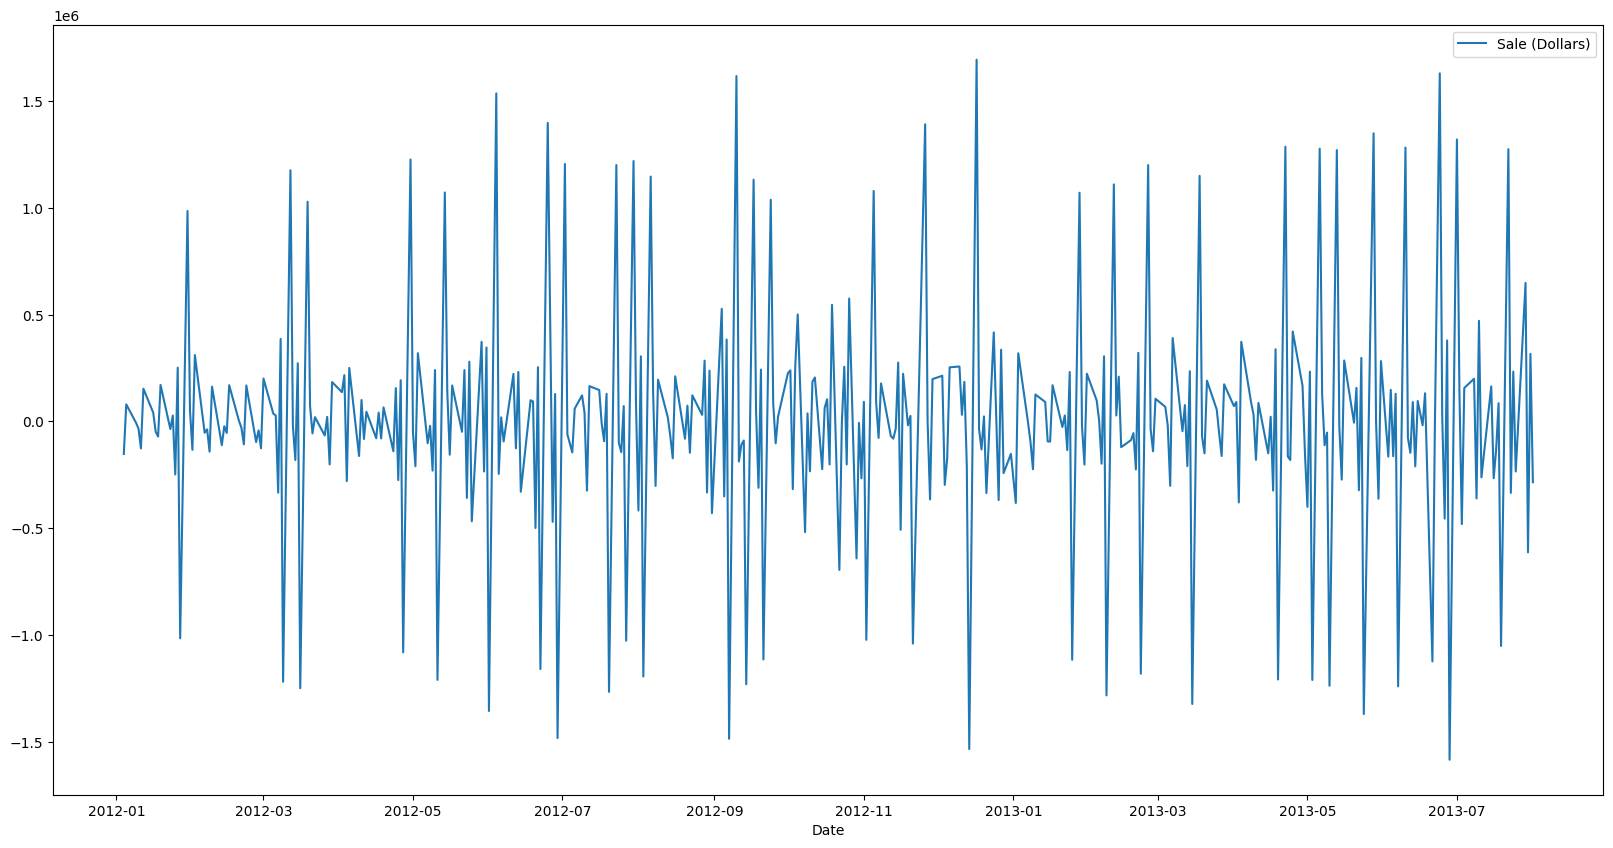

In [21]:
grouped_dif = grouped.diff()
grouped_dif[:365].plot(figsize=(20,10))

In [23]:
grouped_dif

,Sale (Dollars)
Date,
2012-01-03,NaN
2012-01-04,-152440.08
2012-01-05,80141.20
2012-01-09,-6359.43
2012-01-10,-33757.89
...,...
2023-08-27,-1794904.27
2023-08-28,1369488.95
2023-08-29,1052260.23


In [24]:
check_stationarity(grouped_dif[1:])

ADF Statistic: -17.691671
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


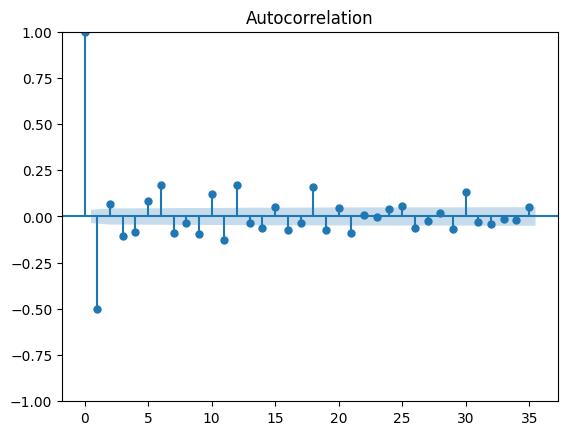

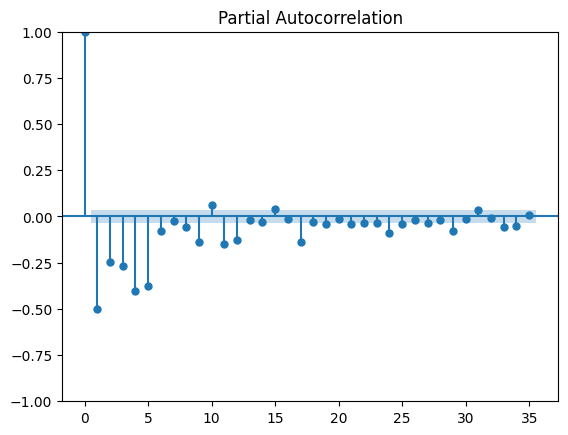

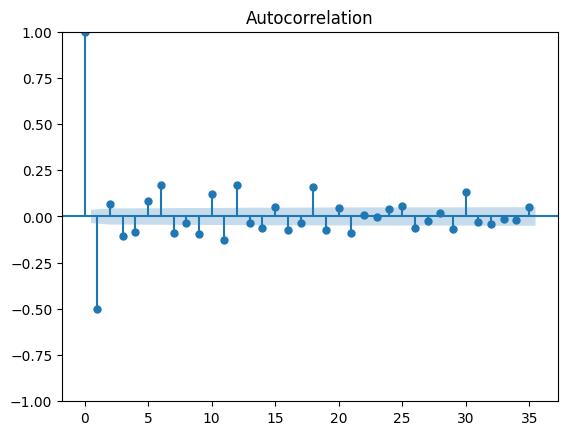

In [26]:
plot_pacf(grouped_dif[1:])
plot_acf(grouped_dif[1:])

<Axes: xlabel='Date'>

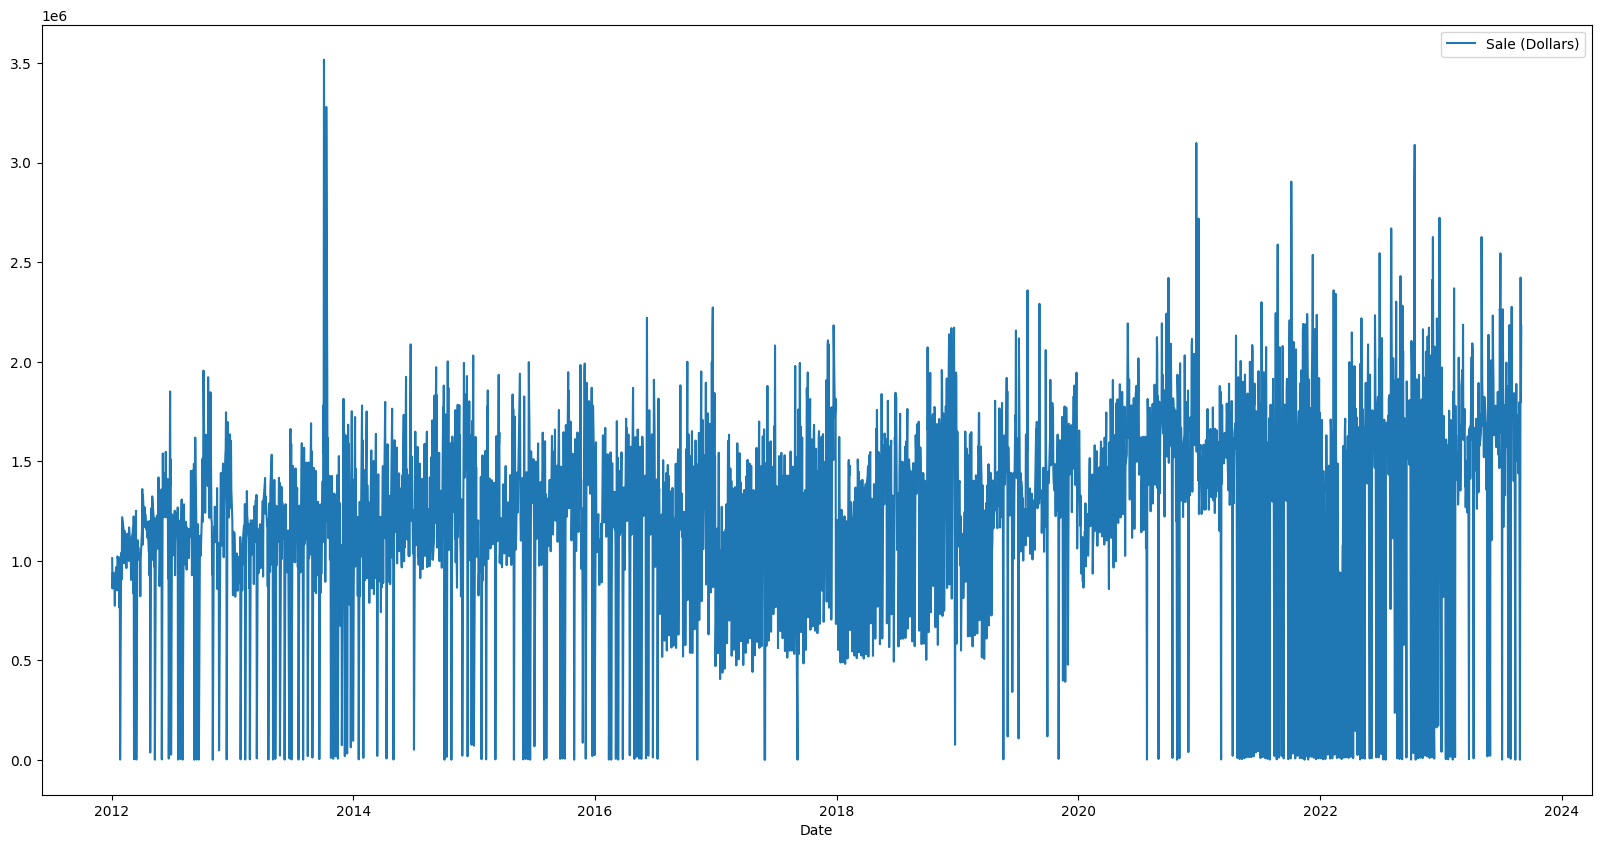

In [26]:
grouped.plot(figsize=(20,10))

<Axes: xlabel='Date'>

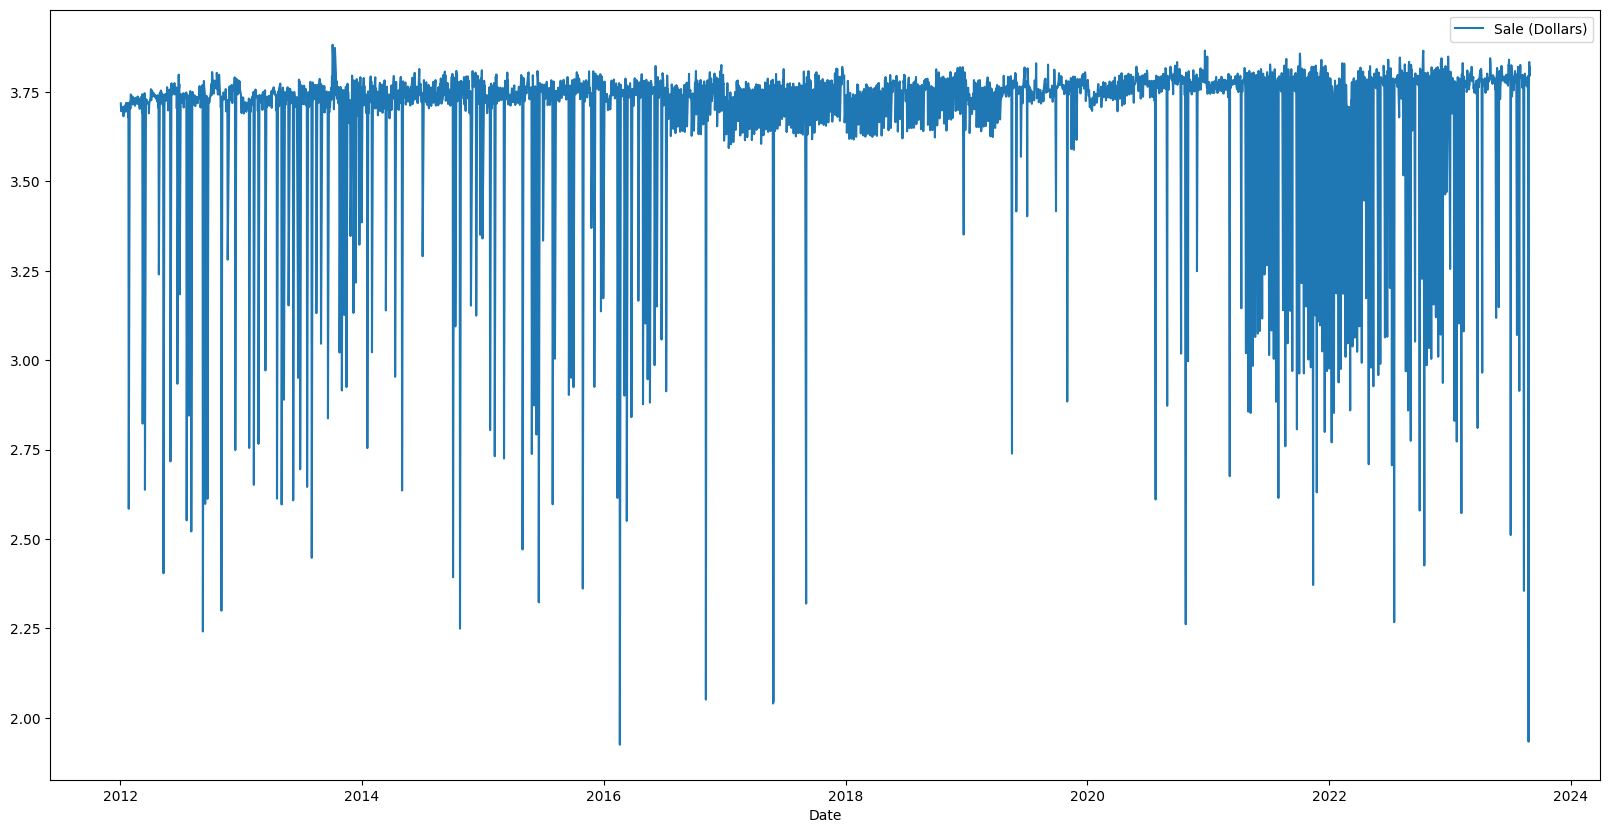

In [27]:
loggroup = np.sqrt(np.log(grouped))
loggroup.plot(figsize=(20,10))

In [100]:
df.shape[0]/11
def normalizer(dataframe):
    return (dataframe - np.min(dataframe)) / (np.max(dataframe) - np.min(dataframe) )
# grouped = normalizer(grouped)


In [150]:
model = ARIMA(
    grouped_dif[:-50],
    order=(5,1,1),
    seasonal_order=(5,1,1,12)
    )

/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [151]:
model_fit = model.fit() 

/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


KeyboardInterrupt: 

In [148]:
model_fit.aic

85898.78453381664

/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


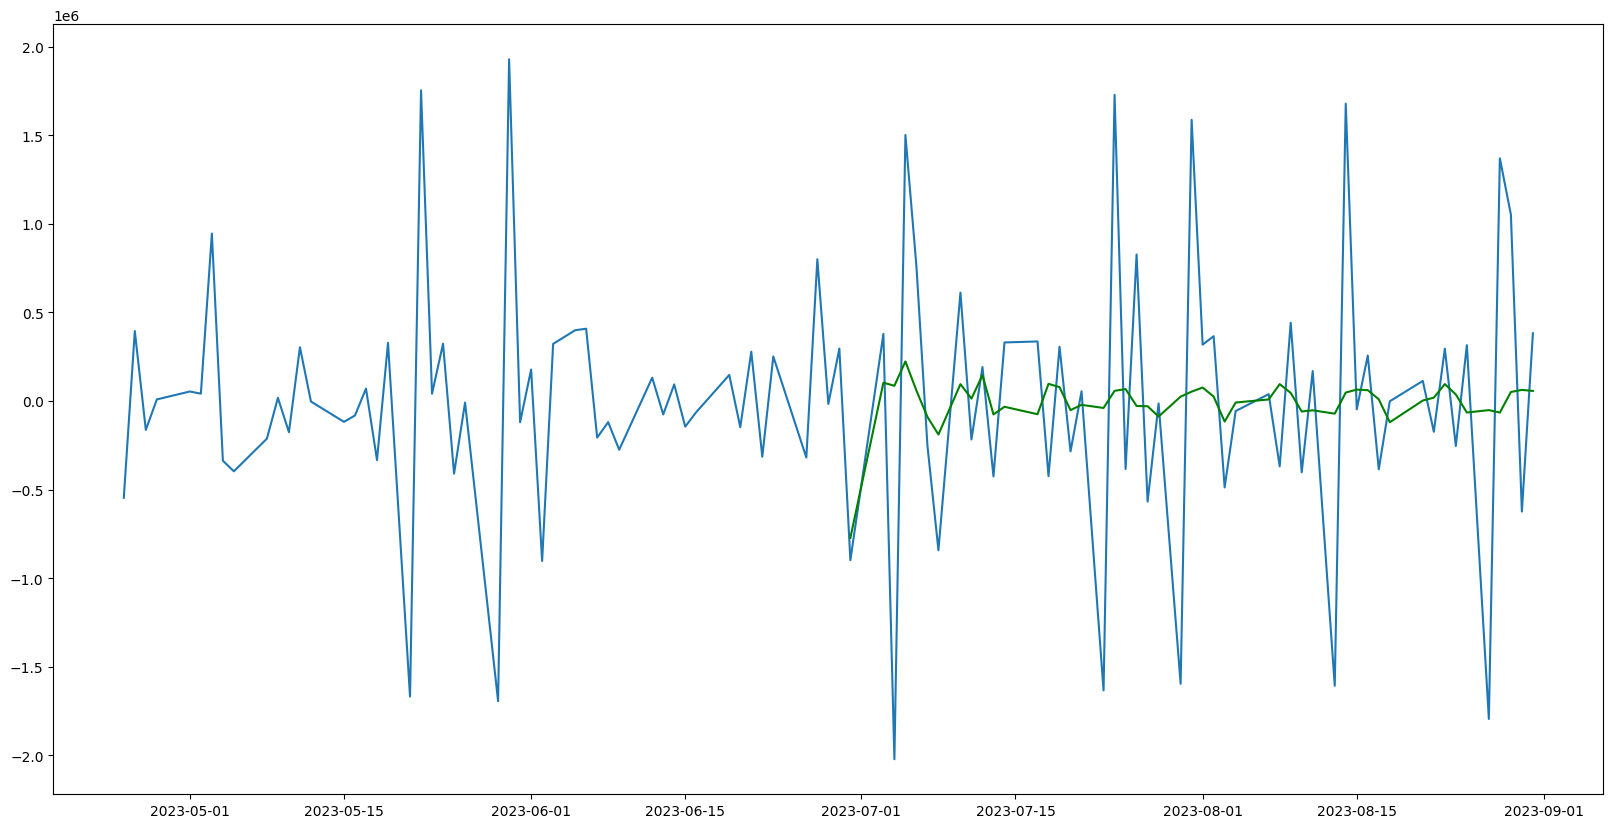

In [149]:
# grouped_dif[-10:].plot(figsize=(20,10))
res = model_fit.forecast(50)
maxdate = np.max(grouped_dif.index)
dates = pd.date_range(start=maxdate,periods=100)
plt.figure(figsize=(20,10))
plt.plot(grouped_dif[-100:])
plt.plot(pd.DataFrame({'Sale (Dollars)':res.values},index=grouped_dif.index[-50:]),color="green")

In [42]:
import pandas as pd
import numpy as np
from itertools import product
from joblib import Parallel, delayed
import statsmodels.api as sm

# Generate or load your time series data
# For demonstration, let's create some sample data
np.random.seed(42)
date_range = pd.date_range(start='2023-01-01', periods=365)
data = np.random.randn(365)
ts = pd.Series(data, index=date_range)

# Define ranges for SARIMA parameters
p_values = range(3)  # Change this range based on your data and assumptions
d_values = range(2)  # Change this range based on your data and assumptions
q_values = range(3)  # Change this range based on your data and assumptions
P_values = range(3)  # Change this range based on your data and assumptions
D_values = range(2)  # Change this range based on your data and assumptions
Q_values = range(3)  # Change this range based on your data and assumptions
s_values = [12]  # Change this if your seasonal period is different

# Create all combinations of parameters
parameter_combinations = list(product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

def fit_sarima(parameters, ts):
    order = parameters[:3]
    seasonal_order = parameters[3:]
    
    try:
        model = ARIMA(ts, order=order, seasonal_order=seasonal_order)
        results = model.fit()
        aic = results.aic
        print(order,seasonal_order,aic)
        return aic, order, seasonal_order
    except:
        return np.inf, None, None

# Define a function to fit SARIMA in parallel
results = Parallel(n_jobs=-1, verbose=1)(delayed(fit_sarima)(params, grouped[:2480048]) for params in parameter_combinations)

# Get the best result
best_result = min(results, key=lambda x: x[0])

best_aic, best_order, best_seasonal_order = best_result
print(f"Best AIC: {best_aic}")
print(f"Best Order: {best_order}")
print(f"Best Seasonal Order: {best_seasonal_order}")



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Download

(0, 0, 0) (0, 1, 0, 12) -1976.5774493739248
(0, 0, 0) (0, 0, 0, 12) -3217.0138164631994


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/ba

(0, 0, 0) (1, 0, 0, 12) -3399.8844594379957


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (0, 0, 1, 12) -3363.9126722695937


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 1, 0, 12) -2634.9885145416238


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (0, 1, 1, 12) -3412.6193371043482


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 0, 1, 12) -3464.3669888270642


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (2, 0, 0, 12) -3433.8626730414376


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 1, 1, 12) -3474.9513053046685


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (0, 1, 2, 12) -3468.5839055831075


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (0, 0, 2, 12) -3406.352057402345


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (0, 0, 0, 12) -3229.906459836691


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (2, 1, 0, 12) -2884.2696727847197


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (0, 0, 1, 12) -3369.920321184857


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (0, 1, 0, 12) -1975.3282178172667


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (0, 1, 1, 12) -3410.977155456844


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (2, 1, 1, 12) -3478.475012472739


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 0, 2, 12) -3507.67410001642
(0, 0, 1) (1, 0, 0, 12) -3402.4446342646424


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/ba

(0, 0, 0) (2, 0, 1, 12) -3513.575257583778


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (1, 1, 0, 12) -2638.7805498036714


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (0, 0, 2, 12) -3408.1285771300554


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (1, 0, 1, 12) -3462.3669979696583


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (0, 1, 2, 12) -3466.6718493027656


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 1, 2, 12) -3478.8853315285314


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (1, 1, 1, 12) -3473.0729509114444


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/base/m

(0, 0, 0) (2, 0, 2, 12) -3517.2998152281825


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (2, 1, 0, 12) -2887.9012369971765


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (2, 0, 0, 12) -3433.087592718557


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (0, 0, 0, 12) -3250.1755815960496


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (0, 0, 1, 12) -3377.6576728824475


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (2, 1, 2, 12) -3476.926777972797


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (0, 1, 0, 12) -1973.8767423480108


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/base/m

(0, 0, 2) (0, 0, 2, 12) -3414.378234158032


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (1, 0, 2, 12) -3505.6833424879187


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (2, 0, 1, 12) -3511.592679188339


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (1, 1, 2, 12) -3477.196899111109


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (0, 1, 1, 12) -3410.9954415034526


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (1, 0, 0, 12) -3407.5085037524914


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (2, 1, 1, 12) -3476.7636196990475


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (1, 1, 0, 12) -2637.3734570263096


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/base/m

(0, 0, 1) (2, 0, 2, 12) -3509.7855500879523


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (1, 0, 1, 12) -3463.920938595966


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (1, 1, 1, 12) -3472.1601060198745


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (2, 1, 0, 12) -2886.1661399160853


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (2, 0, 0, 12) -3437.345861626893


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 1) (2, 1, 2, 12) -3475.245217105896
(0, 0, 2) (0, 1, 2, 12) -3465.771328547875


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/ba

(0, 1, 0) (0, 0, 0, 12) -1376.4176523914387


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (0, 0, 1, 12) -1459.23882493655


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (0, 1, 0, 12) 140.39489813907264


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (0, 0, 2, 12) -1461.880077228146


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (0, 1, 1, 12) -1334.7608793737559


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (1, 0, 0, 12) -1463.5818820850427


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (1, 0, 1, 12) -1461.959359425648


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (1, 0, 2, 12) -1459.95514030516


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (1, 1, 0, 12) -436.0874854976623


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/base/m

(0, 0, 2) (2, 0, 1, 12) -3511.1355750671482


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (2, 1, 1, 12) -3476.068363295305


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (1, 0, 2, 12) -3505.26009909032


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (2, 0, 0, 12) -1461.9568686403388


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (2, 0, 1, 12) -1459.9582342191009


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (0, 1, 2, 12) -1404.5080619668818


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (1, 1, 1, 12) -1406.72892268968


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (2, 1, 0, 12) -689.9539912741527


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (2, 0, 2, 12) -1457.9624665730976


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (0, 0, 0, 12) -3441.9757369381387


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (0, 0, 1, 12) -3520.8000627924425


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (0, 0, 2, 12) -3536.064345405671
(0, 1, 1) (0, 1, 0, 12) -1964.9626193090648


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/ba

(0, 0, 2) (2, 0, 2, 12) -3467.9905091140986


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (1, 0, 0, 12) -3532.40346950426


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (1, 0, 1, 12) -3544.62548762842


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (0, 1, 1, 12) -3437.2736323582685


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (1, 1, 2, 12) -1404.733463708751


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 0) (2, 1, 1, 12) -1404.7340444146394


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (1, 1, 0, 12) -2622.5015233753365


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (2, 0, 0, 12) -3541.526922672953


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (1, 0, 2, 12) -3542.823809686141


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (1, 1, 2, 12) -3476.4609271200943


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (1, 1, 1, 12) -3494.6249184518047


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/base/m

(0, 1, 1) (2, 0, 1, 12) -3542.824057849536


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (2, 0, 2, 12) -3540.7433437122368


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(0, 1, 1) (0, 1, 2, 12) -3489.495566016847


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(0, 1, 2) (0, 0, 0, 12) -3441.044609226914


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(0, 0, 2) (2, 1, 2, 12) -3474.5305704493694


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 2) (0, 0, 1, 12) -3519.1688571902628


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 2) (0, 1, 0, 12) -1963.6865136490412


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 2) (0, 0, 2, 12) -3534.7190463161014


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(0, 1, 2) (1, 0, 0, 12) -3530.835390174567


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(0, 1, 0) (2, 1, 2, 12) -1405.0445661504195
(0, 1, 2) (1, 0, 1, 12) -3543.620128988737


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(0, 1, 2) (0, 1, 1, 12) -3439.4614769376885


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/base/m

(0, 1, 2) (1, 0, 2, 12) -3541.784355193786


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (2, 1, 0, 12) -2871.284033798951


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(0, 1, 1) (2, 1, 1, 12) -3496.9707121477145


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(0, 1, 2) (1, 1, 0, 12) -2626.2188750726127


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(0, 1, 2) (2, 0, 0, 12) -3540.3746240477167


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 2) (2, 0, 1, 12) -3541.783756519638


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 2) (0, 1, 2, 12) -3489.3278302831695


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 2) (2, 0, 2, 12) -3539.7214739141605


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (1, 1, 2, 12) -3488.7388170861927


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (0, 0, 0, 12) -3232.1248501039754


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (0, 0, 1, 12) -3370.722484446825


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (0, 1, 0, 12) -1975.3094686931418


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/base/m

(0, 1, 2) (1, 1, 1, 12) -3494.4985149351946


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (0, 0, 2, 12) -3408.4946920700436


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/base/m

(1, 0, 0) (0, 1, 1, 12) -3410.995926786782


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 0, 0, 12) -3402.8467954409057


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 1) (2, 1, 2, 12) -3477.6664856993


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 1, 0, 12) -2638.9707472729215


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 0, 1, 12) -3462.3670013590076


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (0, 1, 2, 12) -3466.6752593794095


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 1, 1, 12) -3473.0776584836904


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 2) (2, 1, 0, 12) -2874.8431999682625


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/base/m

(1, 0, 0) (2, 0, 0, 12) -3433.1967389802207
(0, 1, 2) (1, 1, 2, 12) -3496.969866463468


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (2, 1, 0, 12) -2888.0416621920103


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 0, 2, 12) -3505.6837467906994
(0, 1, 2) (2, 1, 1, 12) -3496.9358174264244


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/ba

(1, 0, 1) (0, 0, 0, 12) -3442.709757146634


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/base/m

(1, 0, 1) (0, 0, 1, 12) -3520.66240127567
(1, 0, 0) (2, 0, 1, 12) -3511.593506684493


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(1, 0, 0) (2, 1, 1, 12) -3476.776029534661


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(1, 0, 1) (0, 1, 0, 12) -1974.5125169206074


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 1, 2, 12) -3477.2098622576314


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 1) (0, 1, 1, 12) -3408.9918862796117


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/base/m

(1, 0, 1) (1, 0, 1, 12) -3460.4032360188053


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(1, 0, 0) (2, 0, 2, 12) -3513.310210590259


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(1, 0, 1) (1, 0, 0, 12) -3532.104256382259


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(1, 0, 1) (0, 1, 2, 12) -3464.6747111550712


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 1, 2) (2, 1, 2, 12) -3492.9196632057924


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 1, 0, 12) -2639.4272524063636


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 1, 1, 12) -3471.081583330335


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(1, 0, 1) (0, 0, 2, 12) -3535.720622101623


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(1, 0, 1) (2, 1, 0, 12) -2889.199377398796


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/st

(1, 0, 0) (2, 1, 2, 12) -3475.2588091186935


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 0, 2, 12) -3503.6744536783285


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 2) (0, 0, 0, 12) -3254.0806289845154


/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayakashikitsune/Downloads/liquorsales/modeling-env/lib64/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 